In [214]:
import nltk
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## Import Books and Check Lengths

In [5]:
with open('dickens/david_copperfield.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    david_copperfield = contents.lower()

In [165]:
len(david_copperfield)

1968607

In [7]:
with open('dickens/christmas_carol.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    christmas_carol = contents.lower()

In [8]:
len(christmas_carol)

161714

In [9]:
with open('dickens/great_expectations.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    great_expectations = contents.lower()

In [10]:
len(great_expectations)

1013793

In [11]:
with open('dickens/oliver_twist.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    oliver_twist = contents.lower()

In [12]:
len(oliver_twist)

910807

In [13]:
with open('dickens/a_tale_of_two_cities2.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    tale_of_two_cities = contents.lower()

In [14]:
len(tale_of_two_cities)

771153

In [15]:
with open('doyle/adventures_of_sherlock_holmes.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    adventures_of_sherlock_holmes = contents.lower()

In [16]:
len(adventures_of_sherlock_holmes)

574456

In [17]:
with open('doyle/hound_of_the_baskervilles.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    hound_of_the_baskervilles = contents.lower()

In [18]:
len(hound_of_the_baskervilles)

326505

In [19]:
with open('doyle/memoirs_of_sherlock_holmes.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    memoirs_of_sherlock_holmes = contents.lower()

In [20]:
len(memoirs_of_sherlock_holmes)

482873

In [21]:
with open('doyle/return_of_sherlock_holmes.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    return_of_sherlock_holmes = contents.lower()

In [22]:
len(return_of_sherlock_holmes)

621091

In [23]:
with open('doyle/sign_of_four.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    sign_of_four = contents.lower()

In [24]:
len(sign_of_four)

237817

In [25]:
with open('doyle/study_in_scarlet.txt','r') as txt:
    contents = txt.read()
    contents = contents.decode('utf-8')
    study_in_scarlet = contents.lower()

In [26]:
len(study_in_scarlet)

243836

Munging issues: header at the top, not one, but two footers at the bottom, and inconsistent encoding. Ultimately just decoding everything was the route I decided to go down for simplicity.

## Tokenize My Books (Use Built-In NLTK Tokenizer)

In [27]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [28]:
acc = tokenize(christmas_carol)
dc = tokenize(david_copperfield)
ge = tokenize(great_expectations)

In [29]:
ot = tokenize(oliver_twist)
atotc = tokenize(tale_of_two_cities)

In [30]:
aosh = tokenize(adventures_of_sherlock_holmes)

In [31]:
asis = tokenize(study_in_scarlet)
tsof = tokenize(sign_of_four)
rosh = tokenize(return_of_sherlock_holmes)
mosh = tokenize(memoirs_of_sherlock_holmes)
hotb = tokenize(hound_of_the_baskervilles)

I did not normalize my tokens. I am actually personally very uncomfortable with that level of alteration of someone's work. I have spent literally five minutes deciding a single word in a 2000 word essay, because whatever word I choose has to mean exactly what I am trying to convey. I may have to get over this as I get farther into NLP work, but especially in this case, that of using established literature, I did not want to turn 'is' and 'was' into 'be.' Or dogs into dog. That's not how the author wrote it or intended it to be understood.

### Check the Token Lengths

In [32]:
print "Tokens in: acc", len(acc)
print "Tokens in: dc", len(dc)
print "Tokens in: ge", len(ge)
print "Tokens in: ot", len(ot)
print "Tokens in: atotc", len(atotc)
print "Tokens in: aosh", len(aosh)
print "Tokens in: asis", len(asis)
print "Tokens in: tsof", len(tsof)
print "Tokens in: rosh", len(rosh)
print "Tokens in: mosh", len(mosh)
print "Tokens in: hotb", len(hotb)

Tokens in: acc 35659
Tokens in: dc 431374
Tokens in: ge 225422
Tokens in: ot 193897
Tokens in: atotc 166258
Tokens in: aosh 125571
Tokens in: asis 51501
Tokens in: tsof 51615
Tokens in: rosh 134861
Tokens in: mosh 104626
Tokens in: hotb 69961


In [216]:
dickens_total = 35659 + 431374 + 225422 + 193897 + 166258
doyle_total = 125571 + 51501 + 51615 + 134861 + 104626 + 69961

In [209]:
d = {'acc': 35659, 'dc': 431374, 'ge': 225422, 'ot': 193897, 'atotc': 166258,
'aosh': 125571, 'asis': 51501, 'tsof': 51615, 'rosh': 134861, 'mosh': 104626,
'hotb': 69961}

In [211]:
authors = np.array(["dickens", "doyle", "doyle", "dickens", "dickens", "dickens", "doyle", 
                   "doyle", "dickens", "doyle", "doyle"])

In [212]:
length_Series = pd.Series(d)
mini_df = pd.DataFrame(length_Series)
mini_df.rename(columns={0: 'length'}, inplace=True)
mini_df['author'] = authors
mini_df

,length,author
acc,35659,dickens
aosh,125571,doyle
asis,51501,doyle
atotc,166258,dickens
dc,431374,dickens
ge,225422,dickens
hotb,69961,doyle
mosh,104626,doyle
ot,193897,dickens
rosh,134861,doyle


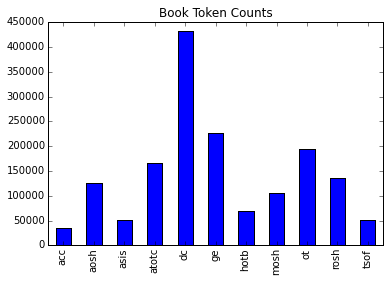

In [215]:
mini_df['length'].plot(kind='bar');
plt.title("Book Token Counts");

Figure to show the lengths of each book compared to each other. This was to give myself and my audience of how long the books were relative to each other.

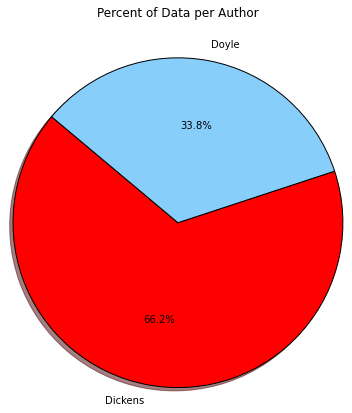

In [217]:
# https://pythonspot.com/matplotlib-pie-chart/

labels = 'Dickens', 'Doyle'
sizes = [dickens_total, doyle_total]
colors = ['red', 'lightskyblue']
 
plt.figure(figsize = (6,6))

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# http://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny
plt.title("Percent of Data per Author", y=1.1)
plt.axis('equal')
plt.show()

The pie chart was great practice for me to learn how to do, and helped to illustrate the difference in data I had for each author. While not horrifically so, there was some aspect of imbalance present.

### Use a Small Program to Chunk Books

In [33]:
#http://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks-in-python
def chunks(l, n):
    n = max(1, n)
    return [l[i:i + n] for i in range(0, len(l), n)]

In [34]:
acc_chunks = chunks(acc, 5000)
dc_chunks = chunks(dc, 5000)
ge_chunks = chunks(ge, 5000)
ot_chunks = chunks(ot, 5000)
atotc_chunks = chunks(atotc, 5000)
aosh_chunks = chunks(aosh, 5000)
asis_chunks = chunks(asis, 5000)
tsof_chunks = chunks(tsof, 5000)
rosh_chunks = chunks(rosh, 5000)
mosh_chunks = chunks(mosh, 5000)
hotb_chunks = chunks(hotb, 5000)

In [35]:
acc_chunks = acc_chunks[0:len(acc_chunks)-1]
dc_chunks = dc_chunks[0:len(dc_chunks)-1]
ge_chunks = ge_chunks[0:len(ge_chunks)-1]
ot_chunks = ot_chunks[0:len(ot_chunks)-1]
atotc_chunks = atotc_chunks[0:len(atotc_chunks)-1]
aosh_chunks = aosh_chunks[0:25]
asis_chunks = asis_chunks[0:len(asis_chunks)-1]
tsof_chunks = tsof_chunks[0:len(tsof_chunks)-1]
rosh_chunks = rosh_chunks[0:len(rosh_chunks)-1]
mosh_chunks = mosh_chunks[0:len(mosh_chunks)-1]
hotb_chunks = hotb_chunks[0:len(hotb_chunks)-1]

### Check Lengths to Make Sure All is Well

In [36]:
total_chunks = acc_chunks + dc_chunks + ge_chunks + ot_chunks + atotc_chunks + aosh_chunks + asis_chunks + tsof_chunks + rosh_chunks + mosh_chunks + hotb_chunks
len(total_chunks)
total_chunks_arr = np.asarray(total_chunks)

In [37]:
dickens_works = acc_chunks + dc_chunks + ge_chunks + ot_chunks + atotc_chunks

In [38]:
doyle_works = aosh_chunks + asis_chunks + tsof_chunks + rosh_chunks + mosh_chunks + hotb_chunks

In [39]:
len(dickens_works)

209

In [40]:
len(doyle_works)

104

In [50]:
len(total_chunks_arr)

313

### Create My 'y'

In [51]:
zeros = np.zeros(209)

In [52]:
ones = np.ones(104)

In [53]:
y = np.concatenate((zeros, ones))
y

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

### Join the Tokens for Use with the Vectorizer

In [54]:
def join_tokens(lst):
    new_list = []
    for chunk in lst:
        new_chunk = " ".join(chunk)
        new_list.append(new_chunk)
    return new_list

In [55]:
joined_chunks = join_tokens(total_chunks)

In [56]:
len(joined_chunks)

313

### Proof that Removing Stop Words Is Good

In [126]:
def cos_similarity(doc1, doc2):
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([doc1, doc2])
    return np.asarray((tfidf * tfidf.T).A)[0][1] 

In [127]:
cos_similarity(oliver_twist, david_copperfield)

0.93440551083002699

In [128]:
cos_similarity(david_copperfield, emma)

0.94253868542075225

In [129]:
def cos_similarity_stop(doc1, doc2):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf = vectorizer.fit_transform([doc1, doc2])
    return np.asarray((tfidf * tfidf.T).A)[0][1] 

In [130]:
cos_similarity_stop(oliver_twist, david_copperfield)

0.70134846548871876

In [131]:
cos_similarity_stop(david_copperfield, emma)

0.60540153687542542

## Vectorizing My Books

In [59]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(joined_chunks)

I used the TF-IDF vectorizer, as I think it is a great way to understand large texts. The idea of scaling down common words had always been on my mind, so to have a tool to do so was perfect.

In [60]:
tfidf

<313x25631 sparse matrix of type '<type 'numpy.float64'>'
	with 296267 stored elements in Compressed Sparse Row format>

In [61]:
tfidf.shape

(313, 25631)

In [62]:
tfidf_real = tfidf.todense()

In [63]:
tfidf_real.shape

(313, 25631)

In [64]:
type(tfidf_real)

numpy.matrixlib.defmatrix.matrix

In [94]:
df = pd.DataFrame(tfidf_real, columns=vectorizer.get_feature_names())
df.head()

,000,10,100,1000,10s,10th,11,1100,117,117th,...,zealous,zealously,zenith,zero,zest,zigzag,zigzagged,zion,zoo,zoology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating my 'X'

In [69]:
X = tfidf_real

In [70]:
X

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Train/Test Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [72]:
print len(X_test)
print len(X_train)

79
234


### Grid Search to Find Optimal SVM Values

In [73]:
svm_svc_grid = {'C': [0.25, .5, 1.0, 1.5, 1.75],
                          'kernel': ['linear', 'poly', 'rbf'],
                          #'degree': [1, 2, 3, 4],
                          'shrinking': [True, False]}

svm_svc_gridsearch = GridSearchCV(svm.SVC(),
                             svm_svc_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='mean_squared_error')

svm_svc_gridsearch.fit(X_train, y_train)

print "best parameters:", svm_svc_gridsearch.best_params_

best_model = svm_svc_gridsearch.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  84 out of  90 | elapsed:   57.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.0min finished


best parameters: {'kernel': 'linear', 'C': 1.0, 'shrinking': True}


### Creating My Model Using Those Values

In [74]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

I chose to use an SVM. It was Lee's recommendation, as he pointed out that as compared to Naive Bayes (which I was considering early in the process), NB was more useful in cases where simplicity, speed, or data from the web was involved. None of those factors affected me, so I turned towards SVM. Other factors were that there were not a ton of classes (initially only two) to potentially confuse the SVM, and there was some imbalance present.

### Cross Validating the Model

In [75]:
cross_val_score(model, X_train, y_train, cv=10)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

I did a ten fold cross validation on my training data. I love the idea of k-folds here, as since I had unbalanced data, I always had a bit of concern that there was a chance that a fold I just happened to select to look at would have been almost entirely work from Charles Dickens, and thus screw up my model. I needed to see if any of my folds would bear this out, and to look at the average as a whole. As you can see, this was not the case. I discussed it at length and in detail during my presentation, so no need to go into it here, but as soon as I saw all ones, 'overfitting' popped into my head. Of all the things we did, I find the cross validation techniques to be some of the most valuable that I learned, as it was an idea that I had not considered seriously on my own. I can understand the value of having some idea of how your model will perform in the wild.

### It Looks Perfect... (Bad?) Check on the Test Data

In [77]:
model.score(X_test, y_test)

1.0

### Overall Summary Statistics

In [83]:
print classification_report(y_test,model.predict(X_test))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        53
        1.0       1.00      1.00      1.00        26

avg / total       1.00      1.00      1.00        79



The nature of my model's performance made it hard to judge performance metrics. Generally, I am a fan of the F1-Score (harmonic mean between precision [TP/{TP+FP}] and recall [TP/{TP+FN}]), as I think it captures a lot of information within one statistic. That is to say, it gives us a window into how good our model is at both finding true positives while avoiding false negatives and finding true positives while avoiding false positives. Next, I know we can't treat it as the end all be all, but I think in my case I would have also paid attention to accuracy. My ultimate goal, to create something along these lines that could tell a writer whose work their writing most likely resembles, wants to make sure it is correct (just like every model). I still love precision and recall, but there is something to be said for just having a simple glance at simply what percent of items your model predicted correctly. In the future, in other models I make, I would like to investigate the AUC metric more as well. I don't remember much of it from class but it seems like it would be useful as well - going hand in hand with the ROC curve. Sadly, an ROC curve wouldn't have given much insight here to my model's performance. 

## Remove Unique Words?

As a way to potentially combat this overfitting, Lee suggested that maybe I remove words that were only unique to one author. First and foremost, I could not figure out a quick and/or easy way to implement this. He suggested just removing columns in the data frame, but my removal of stop words sunk this idea. I tried to do some loops through my data, but it was simply too many loops compounded on top of each other for that to be an effective method. Below you can view some of the work that went in to my failed attempts (I was at least able to pull out the unique words).

In [156]:
count = 0
for chunk in dickens_works:
    if 'sherlock' in chunk:
        count += 1
count

0

In [157]:
count1 = 0
for chunk in doyle_works:
    if 'sherlock' in chunk:
        count += 1
count

89

In [158]:
dickens_works_total = acc + dc + ge + ot + atotc
doyle_works_total = aosh + asis + tsof + rosh + mosh + hotb

In [159]:
print len(dickens_works_total)
print len(doyle_works_total)

1052610
538135


In [160]:
dickens_set = set(dickens_works_total)
doyle_set = set(doyle_works_total)

In [161]:
print len(dickens_set)
print len(doyle_set)

24820
17945


In [162]:
dickens_unique = []
for word in dickens_set:
    if word not in doyle_set:
        dickens_unique.append(word)
len(dickens_unique)
dickens_unique[:20]

[u'gradiwally',
 u'spiders',
 u'self-reliant',
 u'sevens',
 u'canes',
 u'scold',
 u'caned',
 u'stipulate',
 u'strictest',
 u'broiled',
 u'disapinting',
 u'steadfastness',
 u'festered',
 u"'relish",
 u'sooty',
 u'27.',
 u'feasibility',
 u'snuggest',
 u'sustaining',
 u'consenting']

In [163]:
doyle_unique = []
for word in doyle_set:
    if word not in dickens_set:
        doyle_unique.append(word)
len(doyle_unique)
doyle_unique[:20]

[u'1890',
 u'fore-shadowed',
 u'gravel-pit',
 u'dubbed',
 u'clotted',
 u"friend's",
 u'conjuring',
 u'frou-frou',
 u'granting',
 u'adaptable',
 u'unclubable',
 u'117th',
 u'flicking',
 u'co-operation',
 u'retailers',
 u'sunlit',
 u'seven-eighths',
 u'grecian',
 u'wooded',
 u'iron-master']

In [164]:
both_authors = []
for word in doyle_set:
    if word in dickens_set:
        both_authors.append(word)
len(both_authors)

11474

#### (Could not figure out how to effectively remove these unique words + concern about such a drastic step)

In [100]:
#df3 = df2.drop(doyle_unique, axis=1)
# sum = 0
# df3 = df2.copy()
# for name in vectorizer.get_feature_names():
#     if name in doyle_unique or name in dickens_unique:
#         df3 = df3.drop(name, axis=1)

## Remove Most Important Words?

Building off Lee's suggestion, I decided to just instead remove the most important words, which I suspected would be things like names. My hunch was borne out, as we can see that Named Entities like 'Holmes' and 'Watson' was indeed some of the most important features. However, even after I removed them, we can see that other words such as 'Mortimer' (who was a client free Holmes') simply took up the mantle of being the most important feature. So it was an attempt, but it did not seem to go anywhere.

In [189]:
model.coef_[0]

array([ 0.01092405,  0.03596394,  0.02164467, ...,  0.        ,
        0.00251691,  0.        ])

In [190]:
svm_import = model.coef_[0]

In [191]:
svm_import.argsort()

array([14773, 12616, 19749, ..., 13878, 24856, 11084])

In [192]:
words = vectorizer.get_feature_names()
words = np.asarray(words)
words[:20]

array([u'000', u'10', u'100', u'1000', u'10s', u'10th', u'11', u'1100',
       u'117', u'117th', u'12', u'120', u'126b', u'129', u'12s', u'12th',
       u'13', u'131', u'13th', u'14'], 
      dtype='<U29')

In [193]:
indices = svm_import.argsort()
indices[:100]

array([14773, 12616, 19749, 15509, 24972,  2849, 10915, 13614, 14312,
        3175, 14473,  7072, 21509, 18677,  6027,   777,  8524, 13982,
       19432, 23161, 10742,  5158, 14593, 13891, 16705, 14608,  1674,
       12509, 14607,  5842,  5905, 12570, 12579,  8085, 16292,  5836,
       14774, 14827,  4310,  9921,  6979, 13578, 20393,  3569,  3087,
       14707,  9855, 17388,  7653, 22539, 13677, 13771, 10769, 13583,
       13048, 10077, 24979,  5439,  5590,  6460, 15651, 13825, 22882,
       14770, 17389,  8599, 10685, 21422, 25411, 22911,  7294, 22503,
       18923, 19780, 13366,  9417,  5866,  2929, 14100, 24248, 12602,
       19218, 17654,   803,  2387, 16107, 15512, 18484, 10565, 20228,
       16346, 20996, 13817, 14014, 21635,  3078, 21796, 14488, 17730, 16108])

### Found Most Important Words

In [194]:
words[indices][::-1][:100]

array([u'holmes', u'watson', u'man', u'colonel', u'sherlock', u'morstan',
       u'drebber', u'rucastle', u'brunton', u'henry', u'trevor',
       u'musgrave', u'cab', u'hunter', u'dr', u'case', u'sholto', u'moor',
       u'matter', u'shall', u'fort', u'hudson', u'jefferson', u'treasure',
       u'police', u'barrymore', u'room', u'butler', u'just', u'small',
       u'agra', u'barclay', u'maid', u'beddoes', u'hall', u'sir', u'lucy',
       u'mawson', u'train', u'imagine', u'inspector', u'facts', u'rushed',
       u'hardly', u'sahib', u'st', u'stangerson', u'coronet', u'came',
       u'major', u'cottage', u'remarked', u'crime', u'threw', u'answered',
       u'clair', u'black', u'baskerville', u'wife', u'carruthers',
       u'lestrade', u'machine', u'window', u'blessington', u'chance',
       u'companion', u'lawn', u'ferrier', u'later', u'godfrey', u'instant',
       u'sikh', u'stamford', u'test', u'sprang', u'toller', u'arthur',
       u'station', u'opium', u'end', u'ritual', u'thaddeus',

In [195]:
words[indices][::1][:100]

array([u'mr', u'joe', u'scrooge', u'oliver', u'wemmick', u'boy',
       u'herbert', u'lorry', u'micawber', u'bumble', u'miss', u'dora',
       u'steerforth', u'replied', u'defarge', u'agnes', u'fagin',
       u'marquis', u'said', u'traddles', u'havisham', u'copperfield',
       u'monks', u'manette', u'pip', u'monsieur', u'aunt', u'jaggers',
       u'monseigneur', u'dartle', u'dear', u'jerry', u'jew', u'estella',
       u'peggotty', u'darnay', u'mrs', u'murdstone', u'coach', u'giles',
       u'doctor', u'looked', u'sikes', u'carton', u'brownlow', u'mother',
       u'gentleman', u'prison', u'em', u'tellson', u'lucie', u'madame',
       u'head', u'looking', u'larkins', u'going', u'went', u'creakle',
       u'cruncher', u'dick', u'orlick', u'mail', u'tide', u'mowcher',
       u'prisoner', u'fang', u'harry', u'startop', u'wot', u'till',
       u'drummle', u'tears', u'returned', u'sea', u'like', u'fountain',
       u'davy', u'breast', u'maylie', u'uriah', u'jip', u'rosa', u'provis',
       u

In [196]:
common_words = [u'holmes', u'watson', u'man', u'colonel', u'sherlock', u'morstan',
       u'drebber', u'rucastle', u'brunton', u'henry', u'trevor',
       u'musgrave', u'cab', u'hunter', u'dr', u'case', u'sholto', u'moor',
       u'matter', u'shall', u'fort', u'hudson', u'jefferson', u'treasure',
       u'police', u'barrymore', u'room', u'butler', u'just', u'small',
       u'agra', u'barclay', u'maid', u'beddoes', u'hall', u'sir', u'lucy',
       u'mawson', u'train', u'imagine', u'inspector', u'facts', u'rushed',
       u'hardly', u'sahib', u'st', u'stangerson', u'coronet', u'came',
       u'major', u'cottage', u'remarked', u'crime', u'threw', u'answered',
       u'clair', u'black', u'baskerville', u'wife', u'carruthers',
       u'lestrade', u'machine', u'window', u'blessington', u'chance',
       u'companion', u'lawn', u'ferrier', u'later', u'godfrey', u'instant',
       u'sikh', u'stamford', u'test', u'sprang', u'toller', u'arthur',
       u'station', u'opium', u'end', u'ritual', u'thaddeus', u'problem',
       u'client', u'eyford', u'suddenly', u'yellow', u'door', u'holder',
       u'tell', u'fuller', u'strange', u'straker', u'friend', u'street',
       u'achmet', u'obvious', u'medical', u'cried', u'absolutely',
       u'mr', u'joe', u'scrooge', u'oliver', u'wemmick', u'boy',
       u'herbert', u'lorry', u'micawber', u'bumble', u'miss', u'dora',
       u'steerforth', u'replied', u'defarge', u'agnes', u'fagin',
       u'marquis', u'said', u'traddles', u'havisham', u'copperfield',
       u'monks', u'manette', u'pip', u'monsieur', u'aunt', u'jaggers',
       u'monseigneur', u'dartle', u'dear', u'jerry', u'jew', u'estella',
       u'peggotty', u'darnay', u'mrs', u'murdstone', u'coach', u'giles',
       u'doctor', u'looked', u'sikes', u'carton', u'brownlow', u'mother',
       u'gentleman', u'prison', u'em', u'tellson', u'lucie', u'madame',
       u'head', u'looking', u'larkins', u'going', u'went', u'creakle',
       u'cruncher', u'dick', u'orlick', u'mail', u'tide', u'mowcher',
       u'prisoner', u'fang', u'harry', u'startop', u'wot', u'till',
       u'drummle', u'tears', u'returned', u'sea', u'like', u'fountain',
       u'davy', u'breast', u'maylie', u'uriah', u'jip', u'rosa', u'provis',
       u'ai', u'biddy', u'passenger', u'omer', u'rejoined', u'hand',
       u'shore', u'people', u'sophy', u'magwitch', u'mas', u'stopped',
       u'brothers', u'stryver', u'mist', u'pumblechook', u'passengers']

In [170]:
df2 = df.copy()
df2.shape

(313, 25631)

### Removed These Words

In [204]:
df3 = df2.drop(common_words, axis=1)

In [172]:
X = df3.values
len(X)
len(y)

313

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [174]:
print len(X_test)
print len(X_train)

79
234


In [175]:
second_model = svm.SVC(kernel='linear')
second_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Again, Boring Results

In [198]:
cv_scores = cross_val_score(second_model, X_train, y_train, cv=10)
cv_scores

array([ 1.        ,  0.91666667,  1.        ,  0.95833333,  1.        ,
        1.        ,  1.        ,  0.95652174,  1.        ,  1.        ])

In [201]:
print sum(cv_scores) / len(cv_scores)

0.983152173913


In [177]:
second_model.score(X_test, y_test)

1.0

In [202]:
model2_importance = second_model.coef_[0]

In [203]:
indices = model2_importance.argsort()
indices[:100]

array([15369, 13661, 25032, 23206,  8714, 14789, 13807, 10502, 24502,
       11010, 10332,  9572, 21016, 11998,  3910, 20327,  3016, 22138,
       13517, 13548, 10788, 24942, 21930, 19434, 10233, 13956, 18508,
       22853, 17594, 18660,  1152, 19069,  9611,  9268, 14331,  5350,
        6093, 18756, 17465, 21188, 19463,  9648,  1350, 20987, 21257,
        2242,  2836, 20743,  5553,  6875,  4177,  5731, 25256,  9314,
       12653, 13367, 20801,  4873,  9759,  6529,  3789, 20928, 14079,
        1890, 12786, 18421, 24332,  6507, 21674, 13887, 13482, 20060,
        5294,  7064, 22369, 13147,  9390,  2340,  1950, 14219, 18967,
        8163, 10629, 17658,  9828,  2940, 21315, 10172,  8076,  8588,
        4068, 20050,  6710,  3717, 10551, 17492, 19435, 21019, 25160, 16860])

In [205]:
words2 = df3.columns.values

In [207]:
words2[indices][::-1][:100]

array([u'mortimer', u'simon', u'stapleton', u'john', u'milverton',
       u'baker', u'phelps', u'photograph', u'clear', u'gregson', u'hotel',
       u'certainly', u'horse', u'jones', u'hound', u'face', u'james',
       u'pycroft', u'morning', u'indian', u'ross', u'detective',
       u'baronet', u'soames', u'fashion', u'charles', u'reached',
       u'staunton', u'heard', u'theory', u'singular', u'mccarthy', u'duke',
       u'drive', u'advertisement', u'possible', u'trevelyan', u'followed',
       u'london', u'telegram', u'bicycle', u'mountains', u'wilson', u'yes',
       u'cigar', u'excellent', u'clue', u'surely', u'mycroft', u'woodley',
       u'features', u'moran', u'importance', u'adventure', u'evening',
       u'paper', u'save', u'frank', u'geese', u'entirely', u'secretary',
       u'cases', u'far', u'road', u'rooms', u'bartholomew', u'light',
       u'study', u'papers', u'jonathan', u'goose', u'lit', u'gray',
       u'learned', u'lodge', u'american', u'folk', u'lord', u'smith',
   